In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import patsy

#### El problema a resolver:

Se desea saber cuales son las condiciones o variables que influyen significativamente en la demanda de bicicletas en las distintas estaciones del año.

**Informacion del dataset**:

Tomado de: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Actualmente, las bicicletas de alquiler se introducen en muchas ciudades urbanas para mejorar la comodidad de la movilidad. Es importante que la bicicleta de alquiler esté disponible y accesible para el público en el momento adecuado, ya que reduce el tiempo de espera. Con el tiempo, proporcionar a la ciudad un suministro estable de bicicletas de alquiler se convierte en una preocupación importante. La parte crucial es la predicción del conteo de bicicletas requerido en cada hora para el suministro estable de bicicletas de alquiler.
El conjunto de datos contiene información meteorológica (temperatura, humedad, velocidad del viento, visibilidad, punto de rocío, radiación solar, nevadas, precipitaciones), el número de bicicletas alquiladas por hora e información sobre la fecha.

In [2]:
# Importacion de los datos:
df = pd.read_csv("data/bike_clean.csv")

In [3]:
df.head()

,year,month,day,hour,func_day,holiday,°C,°C_dew,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,season,rented_bike
0,2017,12,1,0,1,0,-5.2,-17.6,37,2.2,2000,0.0,0.0,0.0,Winter,254
1,2017,12,1,1,1,0,-5.5,-17.6,38,0.8,2000,0.0,0.0,0.0,Winter,204
2,2017,12,1,2,1,0,-6.0,-17.7,39,1.0,2000,0.0,0.0,0.0,Winter,173
3,2017,12,1,3,1,0,-6.2,-17.6,40,0.9,2000,0.0,0.0,0.0,Winter,107
4,2017,12,1,4,1,0,-6.0,-18.6,36,2.3,2000,0.0,0.0,0.0,Winter,78


# 1 Analisis exploratorio.

## 1.1 Análisis general:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         8760 non-null   int64  
 1   month        8760 non-null   int64  
 2   day          8760 non-null   int64  
 3   hour         8760 non-null   int64  
 4   func_day     8760 non-null   int64  
 5   holiday      8760 non-null   int64  
 6   °C           8760 non-null   float64
 7   °C_dew       8760 non-null   float64
 8   humidity     8760 non-null   int64  
 9   wind_speed   8760 non-null   float64
 10  visibility   8760 non-null   int64  
 11  solar_rad    8760 non-null   float64
 12  rainfall     8760 non-null   float64
 13  snowfall     8760 non-null   float64
 14  season       8760 non-null   object 
 15  rented_bike  8760 non-null   int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 1.1+ MB


In [5]:
df.describe()

,year,month,day,hour,func_day,holiday,°C,°C_dew,humidity,wind_speed,visibility,solar_rad,rainfall,snowfall,rented_bike
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2017.915068,6.526027,15.720548,11.500000,0.966324,0.049315,12.882922,4.073813,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,704.602055
std,0.278796,3.448048,8.796749,6.922582,0.180404,0.216537,11.944825,13.060369,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,644.997468
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-17.800000,-30.600000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,4.000000,8.000000,5.750000,1.000000,0.000000,3.500000,-4.700000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,191.000000
50%,2018.000000,7.000000,16.000000,11.500000,1.000000,0.000000,13.700000,5.100000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,504.500000
75%,2018.000000,10.000000,23.000000,17.250000,1.000000,0.000000,22.500000,14.800000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,1065.250000
max,2018.000000,12.000000,31.000000,23.000000,1.000000,1.000000,39.400000,27.200000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,3556.000000


In [6]:
# Obtenemos las variables numericas y generamos la matriz de correlacion:
var_num = df.select_dtypes(include=['float64','int64'])
matriz_correlacion = var_num.corr()

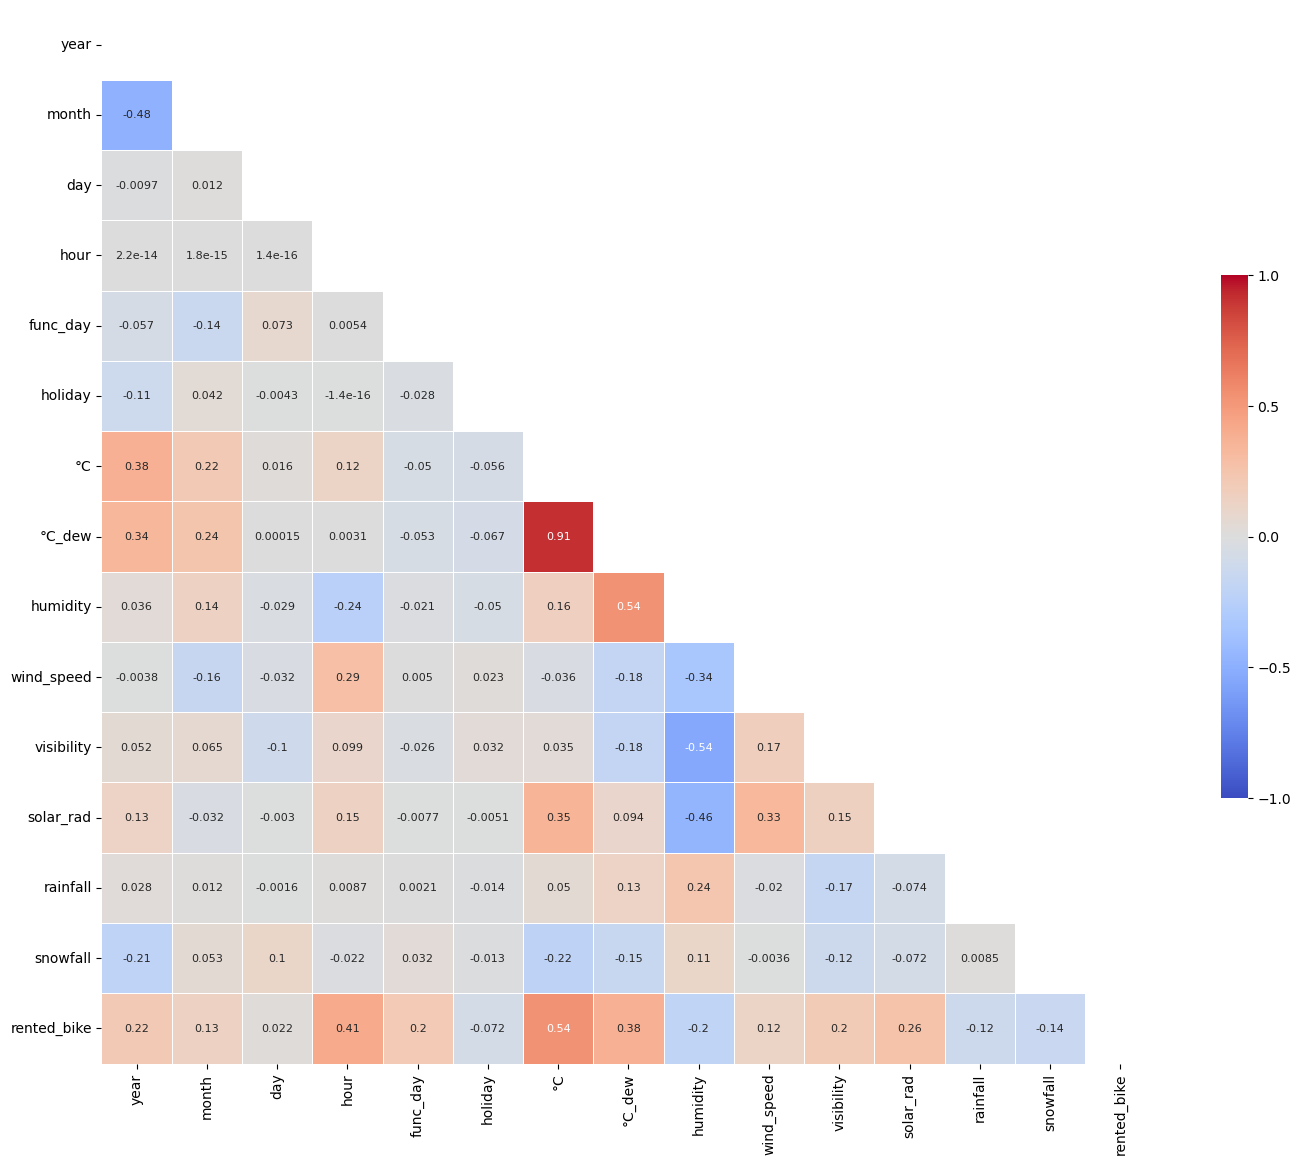

In [7]:
# Graficamos la correlacion entre las variables
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(17, 17))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matriz_correlacion.columns, rotation = 0)
ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

**Observaciones**
- Se puede prever que ciertas variables guardan una relacion muy estrecha y por lo tanto analisarlas puede dar resultados redundantes y mas aun, pueden presentar un peligro de colinealidad al momento de realizar el modelo de machine learning. A continuacion se ofrece el analisis de la variable "°C_dew":

In [8]:
# Regresion multiple sobre las variables "°C", "°C_dew" y "humidity":
y = df["°C_dew"]
X = sm.add_constant(df[["°C", "solar_rad"]])
model1 = sm.OLS(y, X).fit()

In [9]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 °C_dew   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 3.645e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:02:26   Log-Likelihood:                -25160.
No. Observations:                8760   AIC:                         5.033e+04
Df Residuals:                    8757   BIC:                         5.035e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.8509      0.069   -114.549      0.0

In [10]:
# Regresion multiple sobre las variables "°C", "°C_dew" y "humidity":
y = df["°C_dew"]
X = sm.add_constant(df[["°C", "humidity", "solar_rad"]])
model2 = sm.OLS(y, X).fit()

In [11]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 °C_dew   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.243e+05
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:02:26   Log-Likelihood:                -14267.
No. Observations:                8760   AIC:                         2.854e+04
Df Residuals:                    8756   BIC:                         2.857e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.1335      0.050   -442.312      0.0

**Observaciones**

Se observa que las variables "°C", "humidity" y "solar_rad" explican casi el 100% de la variable "°C_dew", esto nos indica el alto nivel de colinealidad que hay entre estas variables. De esta manera de recomienda eliminar la variables "°C_dew".

In [12]:
df.drop(columns=["°C_dew"], inplace=True)

In [13]:
# grafica de "season" vs "rented_bike":
season_bike = df.pivot_table(
    index="season",
    values=["rented_bike"],
    aggfunc={
        "rented_bike": "sum"
    }
)

<Axes: xlabel='season'>

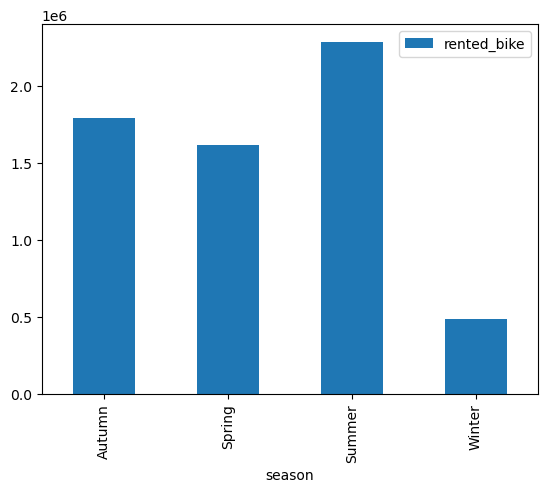

In [14]:
season_bike.plot(kind="bar")

**Observaciones**
- Se observa una clara tendencia de la demanda en las distintas epocas del año. Por otro lado, la variable "month" esta de alguna manera inplicita en la variable "season" por lo que es posible eliminarla.

## 1.2 Analisis univariado.

### 1.2.1 Columna "year":

In [15]:
# Tabla que muestra la relacion entre las estaciones y la demanda de bicicletas:
year_bike = df.pivot_table(
    index=["year"],
    values=["rented_bike"],
    aggfunc={
        "rented_bike": "count",
    }
)
year_bike

,rented_bike
year,
2017,744
2018,8016


**Observaciones**
- Se puede observar que en el año 2017 hay un significativa minoria de datos, por lo que su utilidad se ve reducida. Estos datos pueden ser eliminados.

In [16]:
# Se eliminan las filas donde "year"=2017:
df = df.drop(df[df['year']==2017].index)

In [17]:
# Ahora solo nos que una columna o variable que puede tomar un solo valor.
# por lo que esta columna tambien puede ser eliminada:
df.drop(columns=["year"], inplace=True)

### 1.2.2 Columnas "°C", "humidity" y "solar_rad":

In [18]:
# Nueva columna en el dataset: "grupos_C"
df.loc[:,'grupos_C'] = "(-17, -10]"
df.loc[(df['°C']>-10)&(df['°C']<=0), 'grupos_C'] = "(-10, 0]"
df.loc[(df['°C']>0)&(df['°C']<=5), 'grupos_C'] = "(0, 5]"
df.loc[(df['°C']>5)&(df['°C']<=10), 'grupos_C'] = "(5, 10]"
df.loc[(df['°C']>10)&(df['°C']<=15), 'grupos_C'] = "(10, 15]"
df.loc[(df['°C']>15)&(df['°C']<=20), 'grupos_C'] = "(15, 20]"
df.loc[(df['°C']>20)&(df['°C']<=25), 'grupos_C'] = "(20, 25]"

In [19]:
# Tabla del total de demanda por rango de temperatura persibida:
C_bike = df.pivot_table(
    index=["grupos_C"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)
C_bike.sort_values(by="rented_bike", ascending=False, inplace=True)

<Axes: xlabel='grupos_C'>

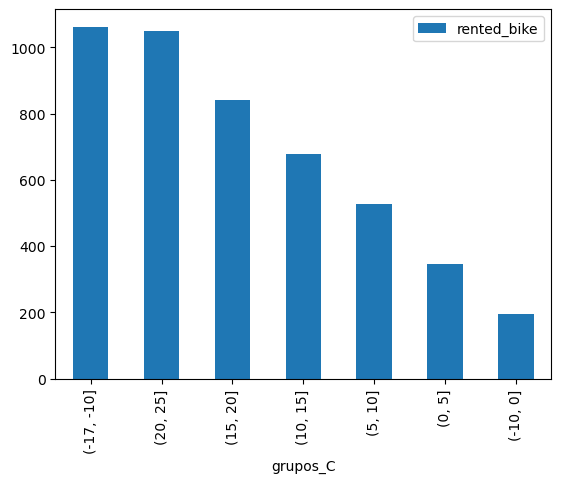

In [20]:
C_bike.plot(kind="bar")

In [21]:
# Nueva columna en el dataset: "grupos_hum"
df.loc[:,'grupos_hum'] = "(0, 25]"
df.loc[(df['humidity']>25)&(df['humidity']<=50), 'grupos_hum'] = "(25, 50]"
df.loc[(df['humidity']>50)&(df['humidity']<=75), 'grupos_hum'] = "(50, 75]"
df.loc[(df['humidity']>75)&(df['humidity']<=100), 'grupos_hum'] = "(75, 100]"

In [22]:
# Tabla del total de demanda por rango de humidad:
hum_bike = df.pivot_table(
    index=["grupos_hum"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)

<Axes: xlabel='grupos_hum'>

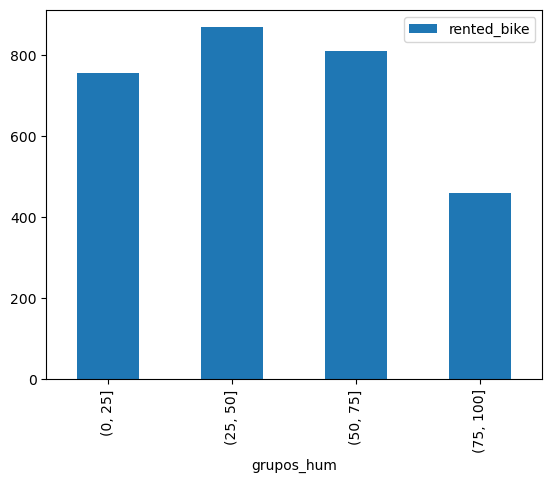

In [23]:
hum_bike.plot(kind="bar")

In [24]:
# Nueva columna en el dataset: "grupos_solar"
df.loc[:,'grupos_solar'] = "(0, 0.7]"
df.loc[(df['solar_rad']>0.7)&(df['solar_rad']<=1.4), 'grupos_solar'] = "(0.7, 1.4]"
df.loc[(df['solar_rad']>1.4)&(df['solar_rad']<=2.1), 'grupos_solar'] = "(1.4, 2.1]"
df.loc[(df['solar_rad']>2.1)&(df['solar_rad']<=2.8), 'grupos_solar'] = "(2.1, 2.8]"
df.loc[(df['solar_rad']>2.8)&(df['solar_rad']<=3.55), 'grupos_solar'] = "(2.8, 3.55]"

In [25]:
# Tabla del total de demanda por rango de humidad:
solar_bike = df.pivot_table(
    index=["grupos_solar"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)

<Axes: xlabel='grupos_solar'>

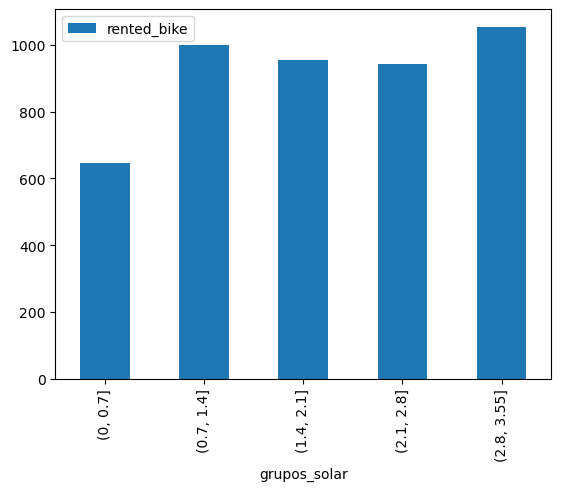

In [26]:
solar_bike.plot(kind="bar")

**Observaciones**
- Se puede observar una clara tendencia en la variable "°C". La columna "°C" es una variable predictora.
- Se observa que la humedad entre mas alta, menor demanda hay de las bicicletas.
- En cuanto a la columna "solar_rad" se observa que mientras mas baja sea la radiacion menos demanda de bicicletas hay.

### 1.2.3 Columnas "func_day" y "holiday":

In [27]:
func_bike = df.pivot_table(
    index=["func_day"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "count"
    }
)
func_bike

,rented_bike
func_day,
0,295
1,7721


<Axes: xlabel='func_day'>

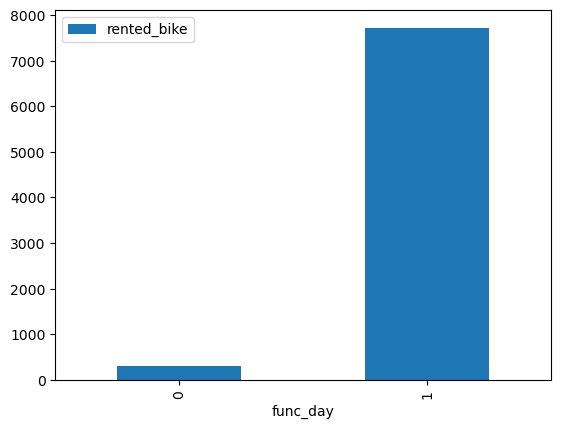

In [28]:
func_bike.plot(kind="bar")

In [29]:
holiday_bike = df.pivot_table(
    index=["holiday"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)

<Axes: xlabel='holiday'>

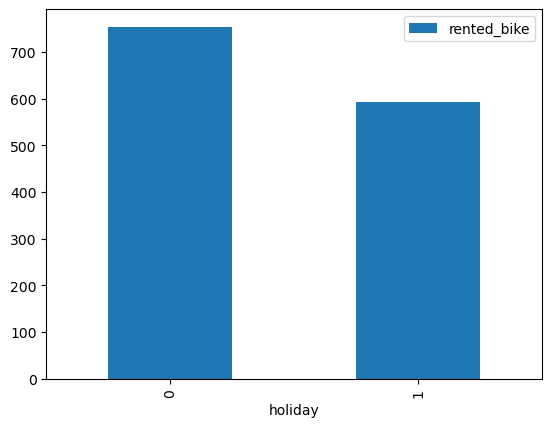

In [30]:
holiday_bike.plot(kind="bar")

**Observaciones**

- La columna "func_day" no nos ofrece informacion relevante, puesto que en nuestro problema se presupone que se debe analizar la demanda de bicicletas en dias funcionales.
- Se observa referente a la columna "holiday" que la demanda tiene una clara tendencia, especificamente se tiene que en dias festivos hay una disminucion de la demanda de bicicletas. 

In [31]:
# Se eliminan las filas donde "func_day"=0:
df = df.drop(df[df['func_day']==0].index)

### 1.2.4 Analisis de las columnas "day" y "hour":

In [32]:
# Tabla de la media de la cantidad de bicicletas rentadas por dia:
day_bike = df.pivot_table(
    index=["day"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)

<Axes: xlabel='day'>

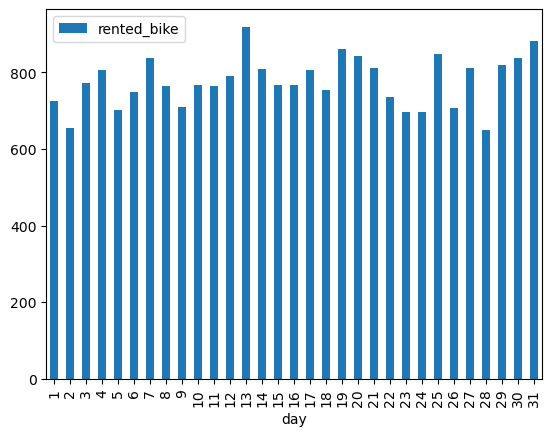

In [33]:
day_bike.plot(kind="bar")

In [34]:
# Creacion de la columna "hours":
df.loc[:,'hours'] = "[0, 4]"
df.loc[(df['hour']>4)&(df['hour']<=8), 'hours'] = "(4, 8]"
df.loc[(df['hour']>8)&(df['hour']<=12), 'hours'] = "(8, 12]"
df.loc[(df['hour']>12)&(df['hour']<=16), 'hours'] = "(12, 16]"
df.loc[(df['hour']>16)&(df['hour']<=20), 'hours'] = "(16, 20]"
df.loc[(df['hour']>20)&(df['hour']<24), 'hours'] = "(20, 0)"

In [35]:
hours_bike = df.pivot_table(
    index=["hours"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)
hours_bike.sort_values(by="rented_bike", ascending=False, inplace=True)

<Axes: xlabel='hours'>

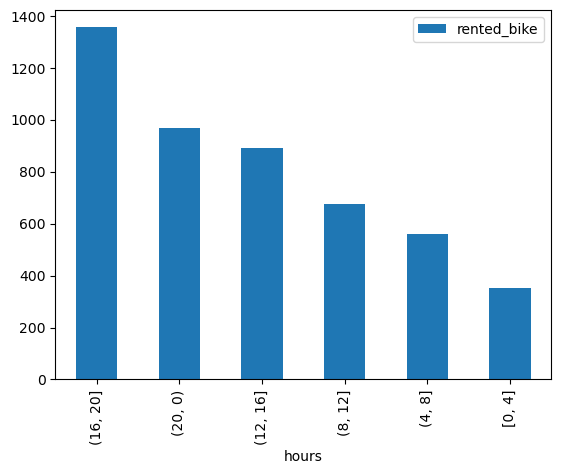

In [36]:
hours_bike.plot(kind="bar")

In [37]:
# Creacion de la columna "day_div":
df.loc[:,'day_div'] = "madrugada"
df.loc[(df['hour']>6)&(df['hour']<=12), 'day_div'] = "mañana"
df.loc[(df['hour']>12)&(df['hour']<=18), 'day_div'] = "tarde"
df.loc[(df['hour']>18)&(df['hour']<24), 'day_div'] = "noche"

In [38]:
div_bike = df.pivot_table(
    index=["day_div"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)
div_bike.sort_values(by="rented_bike", ascending=False, inplace=True)

<Axes: xlabel='day_div'>

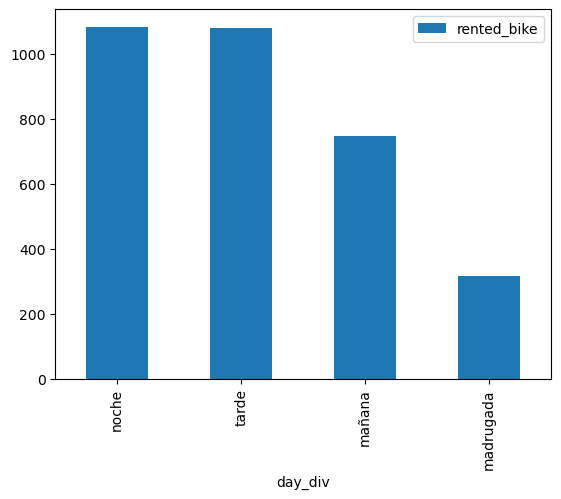

In [39]:
div_bike.plot(kind="bar")

In [40]:
hour_bike = df.pivot_table(
    index=["hour"],
    values="rented_bike",
    aggfunc={
        "rented_bike": "mean"
    }
)
hour_bike.sort_values(by="rented_bike", ascending=False, inplace=True)

<Axes: xlabel='hour'>

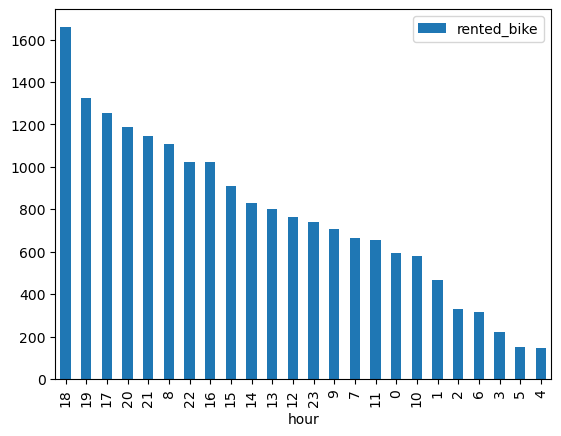

In [41]:
hour_bike.plot(kind="bar")

**Observaciones**

- En la columna "day" se observa un comportamiento irregular, esta variable al parecer no es predictora.
- En cuanto a las horas, se observa que es de 4 de la tarde hasta avansada la noche, en donde hay un mayor numero de demanda.

In [42]:
df.drop(columns=["day"], inplace=True)

### 1.2.5 Analisis de las columnas "wind_speed" y "visibility:

In [43]:
# Nueva columna en el dataset: "grupos_wind"
df.loc[:,'grupos_wind'] = "(0, 1.5]"
df.loc[(df['wind_speed']>1.5)&(df['wind_speed']<=3), 'grupos_wind'] = "(1.5, 3]"
df.loc[(df['wind_speed']>3)&(df['wind_speed']<=4.5), 'grupos_wind'] = "(3, 4.5]"
df.loc[(df['wind_speed']>4.5)&(df['wind_speed']<=6), 'grupos_wind'] = "(4.5, 6]"
df.loc[(df['wind_speed']>6)&(df['wind_speed']<=7.5), 'grupos_wind'] = "(6, 7.5]"

In [44]:
# Tabla dinamica de "wind_speed" vs "rented_bike":
wind_bike = df.pivot_table(
    index=["grupos_wind"],
    values=["rented_bike"],
    aggfunc={
        "rented_bike": "mean",
    }
)

<Axes: xlabel='grupos_wind'>

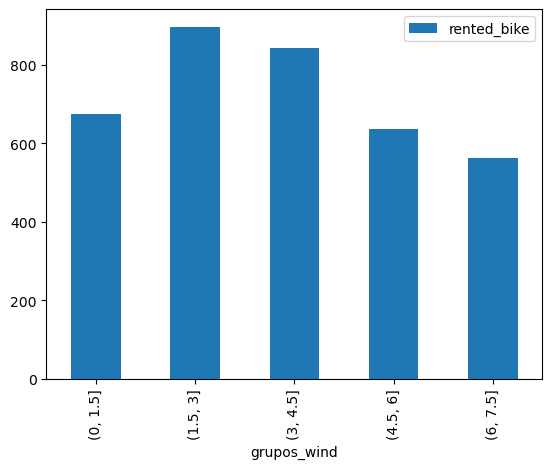

In [45]:
wind_bike.plot(kind="bar")

In [46]:
# Nueva columna en el dataset: "grupos_vis"
df.loc[:,'grupos_vis'] = "(0, 500]"
df.loc[(df['visibility']>500)&(df['visibility']<=1000), 'grupos_vis'] = "(500, 1000]"
df.loc[(df['visibility']>1000)&(df['visibility']<=1500), 'grupos_vis'] = "(1000, 1500]"
df.loc[(df['visibility']>1500)&(df['visibility']<=2000), 'grupos_vis'] = "(1500, 2000]"

In [47]:
vis_bike = df.pivot_table(
    index=["grupos_vis"],
    values=["rented_bike"],
    aggfunc={
        "rented_bike": "mean",
    }
)
vis_bike.sort_values(by="rented_bike", inplace=True)

<Axes: xlabel='grupos_vis'>

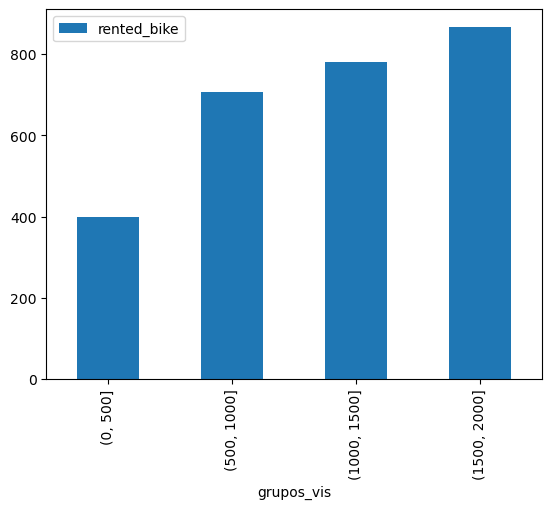

In [48]:
vis_bike.plot(kind="bar")

**Observaciones**
- En la columna "wind_speed" se puede observar que hay en sus extremos la demanda cae.
- En la columna "visibility" se puede eliminar y crear una nueva de tipo booleano que represente si la visibilidad es adecuada o no.

In [49]:
# Nueva columna en el dataset: "vis_appr":
df.loc[:,'vis_appr'] = 1
df.loc[(df['visibility']<500), 'vis_appr'] = 0

### 1.2.6 Analisis de las columnas "rainfall" y "snowfall":

In [50]:
# Nueva columna en el dataset: "grupos_rain"
df.loc[:,'grupos_rain'] = "0"
df.loc[(df['rainfall']>0), 'grupos_rain'] = "<0"

<Axes: xlabel='grupos_rain'>

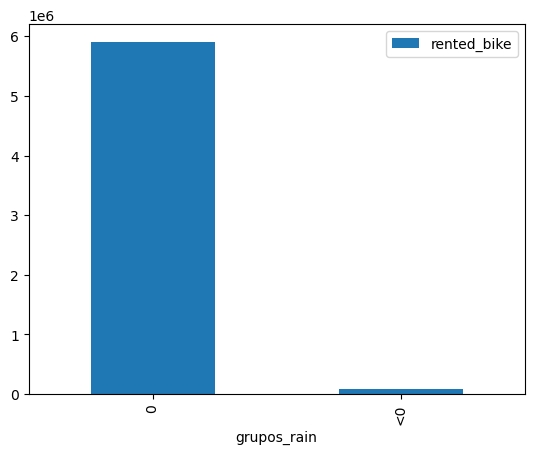

In [51]:
rain_bike = df.pivot_table(
    index=["grupos_rain"],
    values=["rented_bike"],
    aggfunc={
        "rented_bike": "sum",
    }
)
rain_bike.plot(kind="bar")

In [52]:
# Nueva columna en el dataset: "grupos_snow"
df.loc[:,'grupos_snow'] = "0"
df.loc[(df['snowfall']>0), 'grupos_snow'] = "<0"

<Axes: xlabel='grupos_snow'>

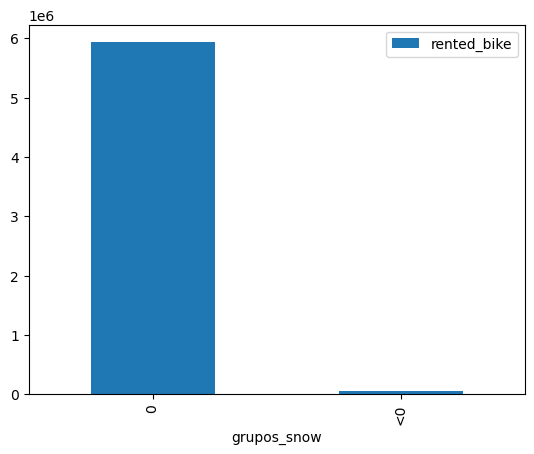

In [53]:
snow_bike = df.pivot_table(
    index=["grupos_snow"],
    values=["rented_bike"],
    aggfunc={
        "rented_bike": "sum",
    }
)
snow_bike.plot(kind="bar")

**Observaciones**

- En las columnas anteriores se puede observar un comportamiento similar, el cual es que frente al aumento de lluvia o nieve, incluso si es un aumento relaivamente minimo, la demanda de bicicletas cae significativamente. Por otro lado, puesto que estas variables tienen un mismo efecto tanto ambiental como en las demandas de bicicleta, se eliminaran y se creara un nueva columna de tipo booleano que nos dira si hay presencia de lluvia o de nieve.

In [54]:
# Nueva columna en el dataset: "rain/snow":
df.loc[:,'rain/snow'] = 0
df.loc[(df['rainfall']>0) | (df["snowfall"]>0), 'rain/snow'] = 1

In [55]:
df.columns

Index(['month', 'hour', 'func_day', 'holiday', '°C', 'humidity', 'wind_speed',
       'visibility', 'solar_rad', 'rainfall', 'snowfall', 'season',
       'rented_bike', 'grupos_C', 'grupos_hum', 'grupos_solar', 'hours',
       'day_div', 'grupos_wind', 'grupos_vis', 'vis_appr', 'grupos_rain',
       'grupos_snow', 'rain/snow'],
      dtype='object')

In [56]:
# Eliminamos las columnas que ya no vamos a usar:
df.drop(columns=["grupos_wind", "grupos_vis", "grupos_rain", "grupos_snow", "rainfall", "snowfall", "func_day"], inplace=True)

## 1.3 Analisis bivariado.

In [57]:
df.head()

,month,hour,holiday,°C,humidity,wind_speed,visibility,solar_rad,season,rented_bike,grupos_C,grupos_hum,grupos_solar,hours,day_div,vis_appr,rain/snow
744,1,0,1,-3.2,40,0.5,1358,0.0,Winter,206,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
745,1,1,1,-3.3,41,0.7,2000,0.0,Winter,230,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
746,1,2,1,-3.7,42,0.9,2000,0.0,Winter,178,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
747,1,3,1,-4.0,44,1.0,2000,0.0,Winter,119,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
748,1,4,1,-4.2,53,1.1,1994,0.0,Winter,62,"(-10, 0]","(50, 75]","(0, 0.7]","[0, 4]",madrugada,1,0


In [58]:
# Tasa de conversión para dos columnas
def graficar_bivariada(col_list, orden=None):
  tc = df.groupby(col_list)['rented_bike'].mean().to_frame().reset_index()

  # Gráfica
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['rented_bike'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Renta de bisicletas para {col_list[0]} y {col_list[1]}')
  plt.xlabel('Renta de bicicletas (promedio)')
  plt.xlim((0,2000));

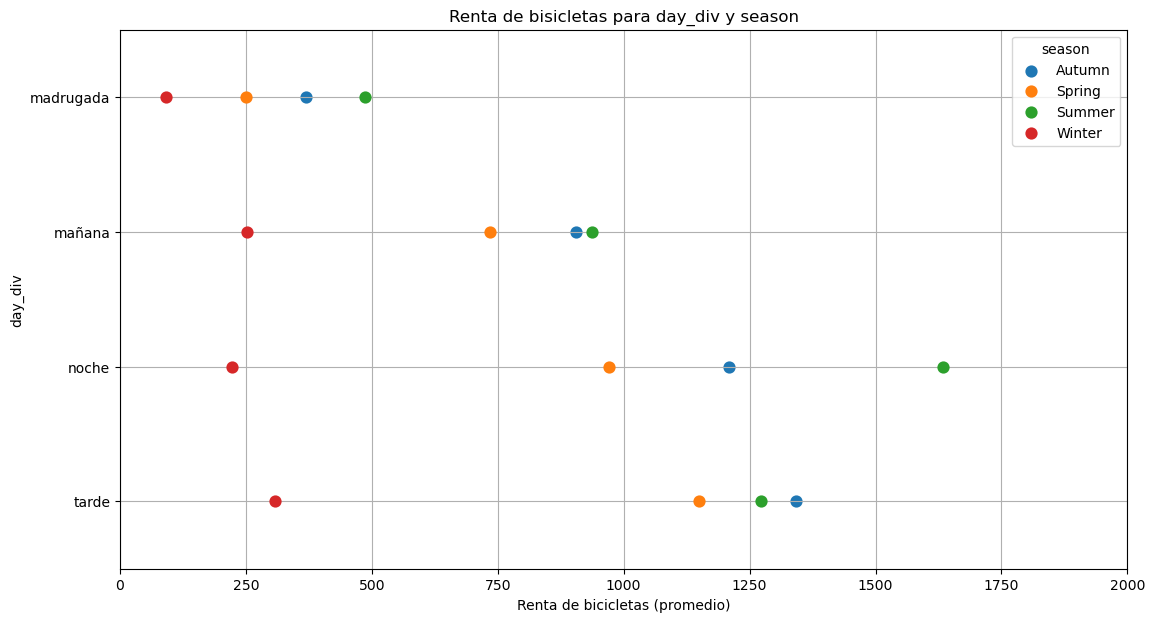

In [59]:
#  Par "hours" y "day_div"
graficar_bivariada(["day_div", "season"])

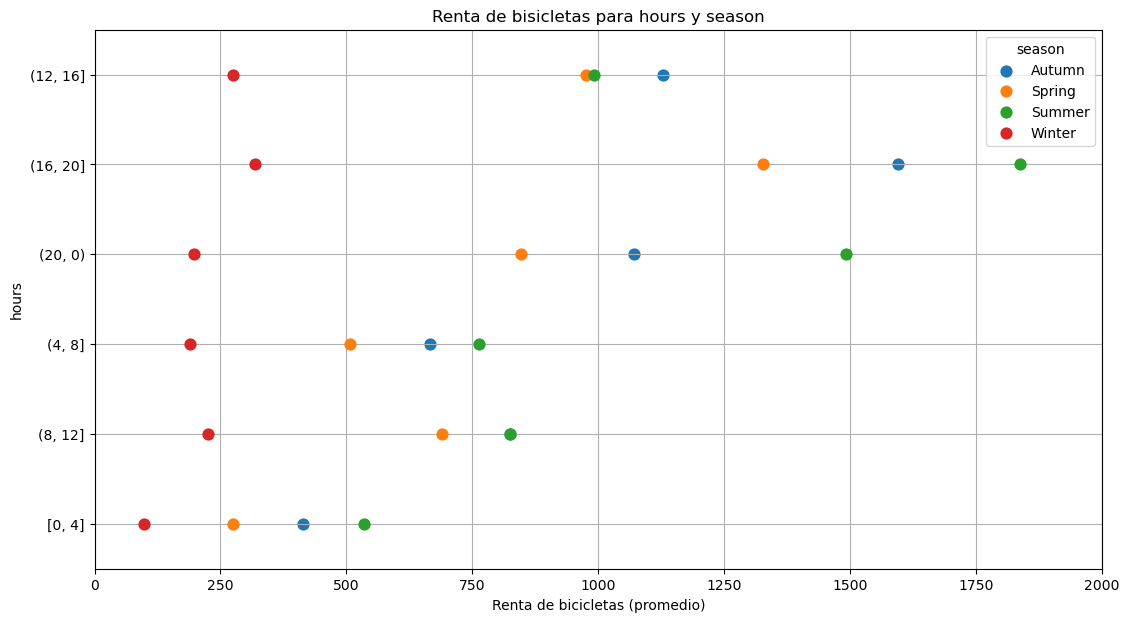

In [60]:
#  Par "hours" y "°hours"
graficar_bivariada(["hours", "season"])

- Se observa que en el invierno en general siempre hay menos demanda a todas horas, sin embargo es en la segunda mitad del dia que la diferencia con respectos a las demas estaciones es bastante considerable.
- Se observa que es la noche en donde mas demanda hay de bicicletas, sin embargo en la anterior grafica vemos que es de 4 de la tarde a 8 de la noche cuando hay mas demanda.

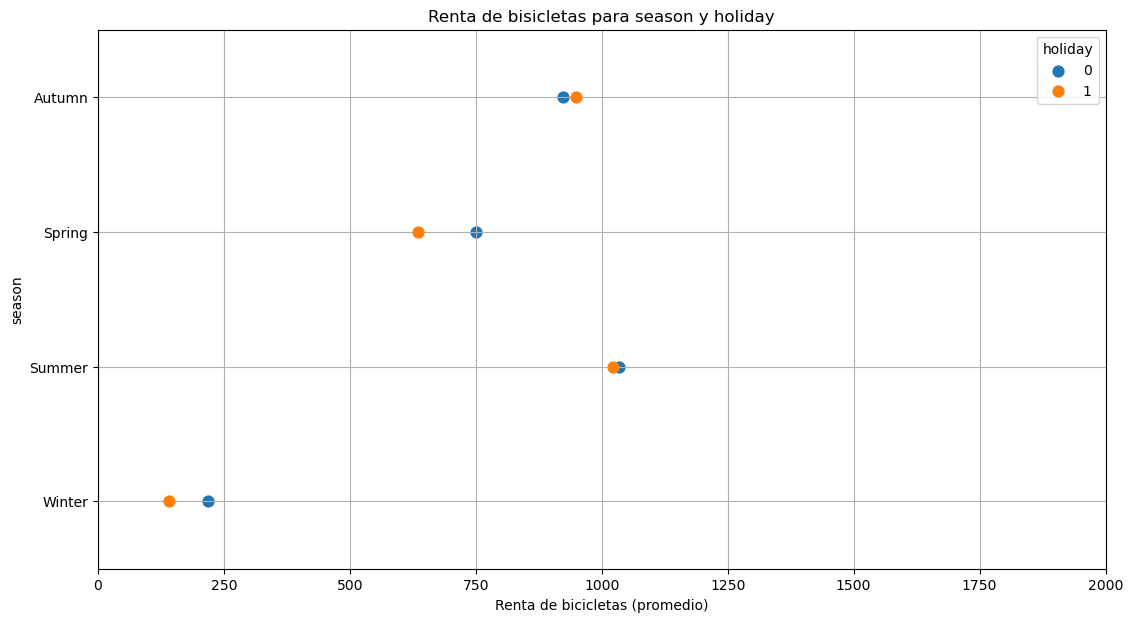

In [61]:
#  Par "hours" y "holiday":
graficar_bivariada(["season", "holiday"])

- Se puede ver como en verano la demanda de bicicletas es indiferente a si un dia es festivo o no.

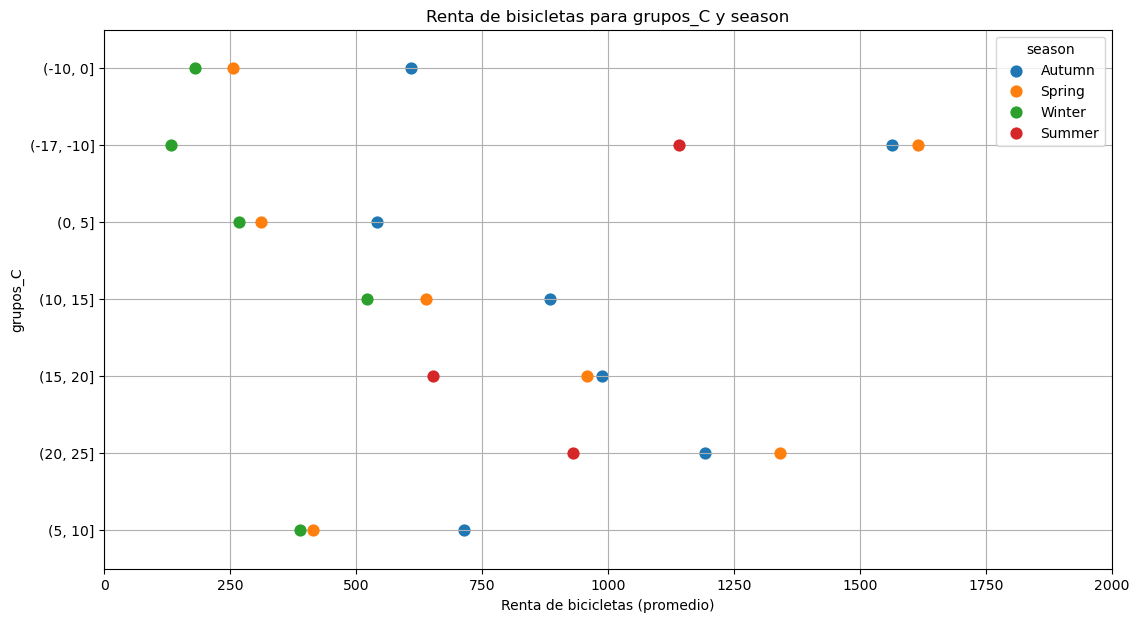

In [62]:
#  Par "season" y "grupos_C_dew":
graficar_bivariada(["grupos_C", "season"])

- Resulta interesante ver como son las temperaturas bajas en las que mas hay demandas de bicicletas y sin embargo en el rango de -10 grados a 0 grados no hay mucha demanda.

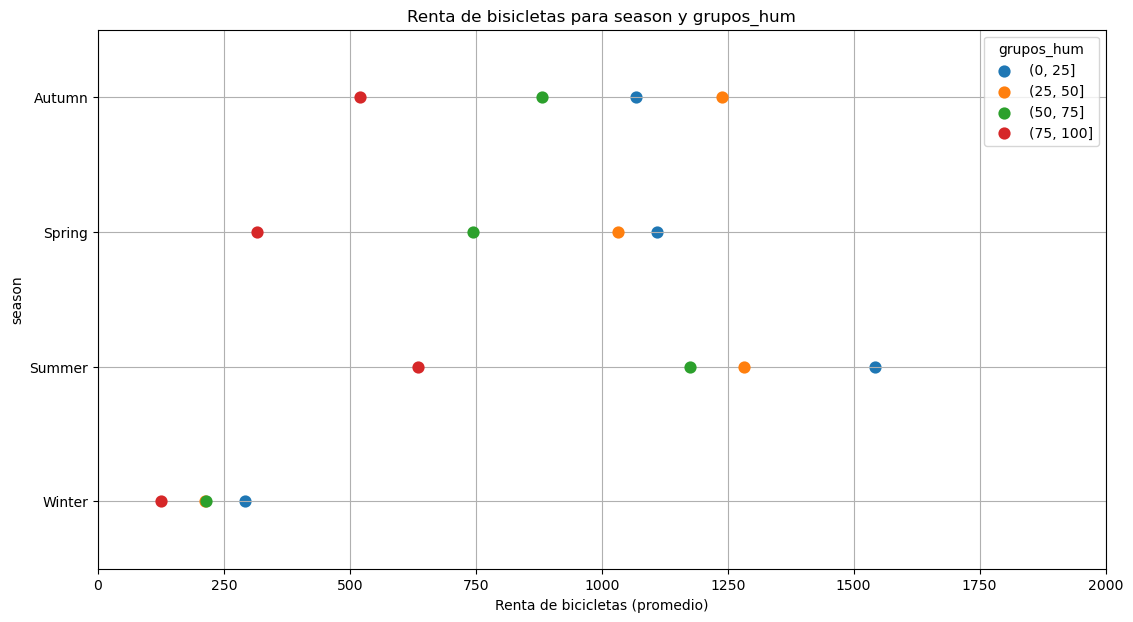

In [63]:
#  Par "season" y "grupo_hum":
graficar_bivariada(["season", "grupos_hum"])

- En general la demanda de bicicletas es mayor cuando la humedad es baja.

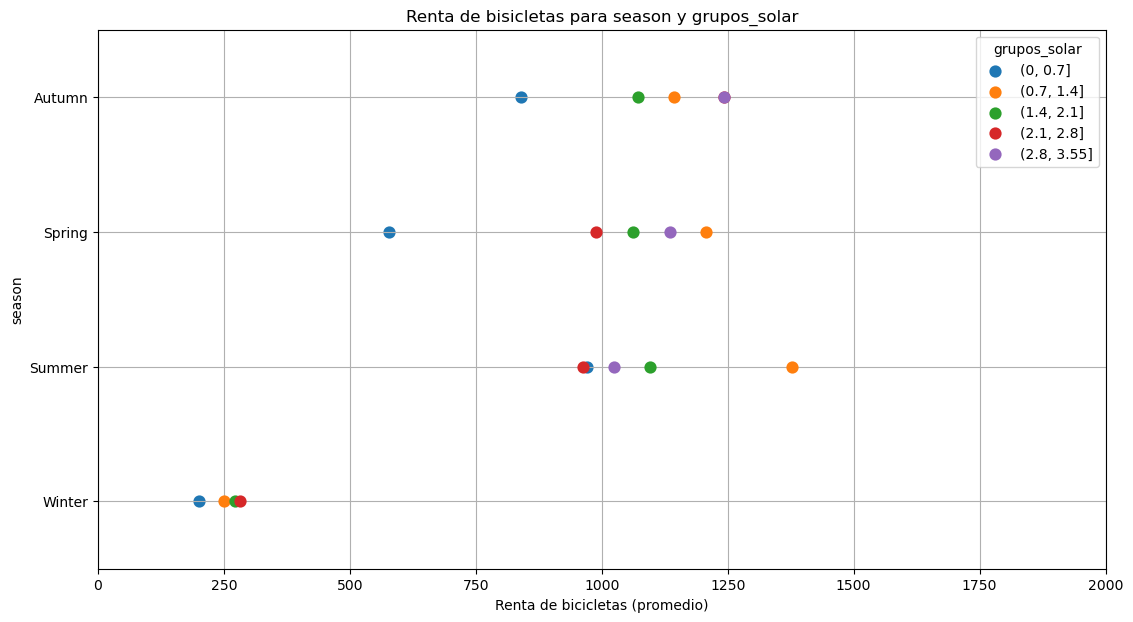

In [64]:
#  Par "season" y "grupos_solar":
graficar_bivariada(["season", "grupos_solar"])

- En invierno, otoño y primavera las radiaciones mas altas aumentan la demanda, mientras que en verano son las radiaciones relativamente bajas la que provocan una mayor demanda.

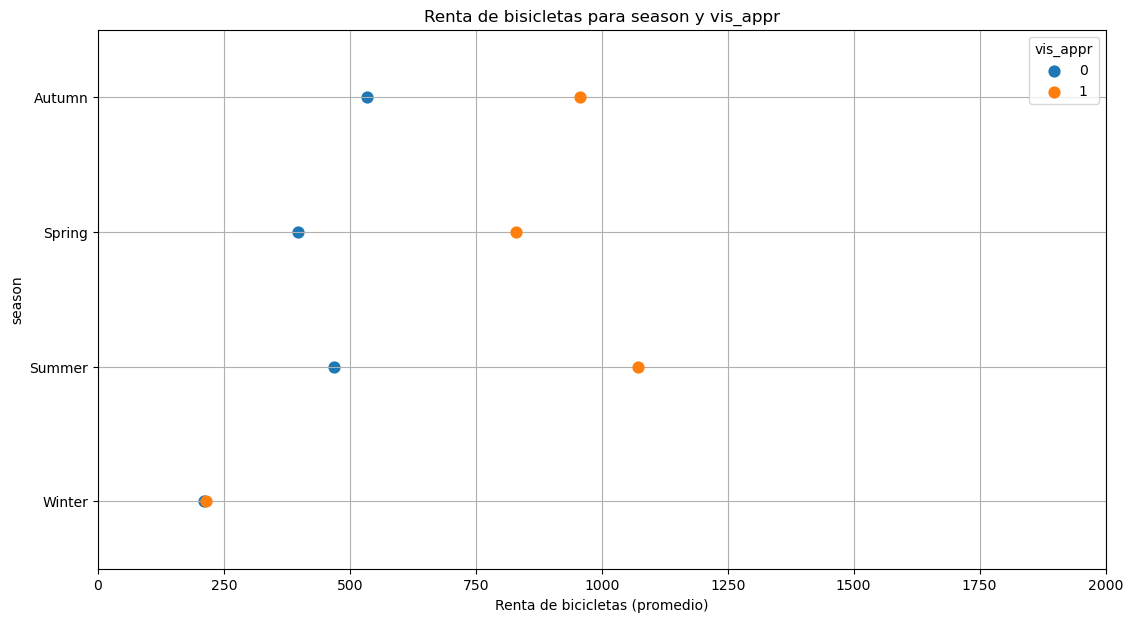

In [65]:
#  Par "season" y "vis_appr":
graficar_bivariada(["season", "vis_appr"])

- se puede observar que cuando hay buena visibilidad la demanda de bicicletas aumenta.

# Conclusiones:

- Las estaciones con mas demanda en orden descendente son: Verano, otoño, primavera e invierno.
- Con este análisis podemos anotar los siguientes puntos por estacion:
    - Primavera:
        - La mayor demanda de bicicletas se encuentre entre las 12 del medio dia hasta las 8 de la noche.
        - En los dias festivos si hay una disminucion de la demanda.
    - Verano: 
        - La mayor demanda de bicicletas se envuentra entre las 4 de la tarde hasta las 12am del dia siguiente.
        - Los dias festivos no suponen ninguna influencia en la demanda de bicicletas.
    - Otoño:
        - La mayor demanda de bicicletas se encuentre entre las 12 del medio dia hasta las 8 de la noche.
        - En los dias festivos si hay una disminucion de la demanda.
    - Invierno:
        - En general es muy reducida la demanda en esta estacion del año, siendo las distintas variables poco relevantes para sacar destacar el impacto de estas.
- Como condiciones generales:
    - Se observa que las temperaturas por encima de los 20 grados y por debajo de los -15 grados, si suponen una condicion a tener en cuenta, pues reducen la demanda de bicicletas de manera significativa indiferentemente de la estacion.
    - Si llueve o nieva la demanda se reduce enormemente, no importa la estacion.

In [66]:
df.head()

,month,hour,holiday,°C,humidity,wind_speed,visibility,solar_rad,season,rented_bike,grupos_C,grupos_hum,grupos_solar,hours,day_div,vis_appr,rain/snow
744,1,0,1,-3.2,40,0.5,1358,0.0,Winter,206,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
745,1,1,1,-3.3,41,0.7,2000,0.0,Winter,230,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
746,1,2,1,-3.7,42,0.9,2000,0.0,Winter,178,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
747,1,3,1,-4.0,44,1.0,2000,0.0,Winter,119,"(-10, 0]","(25, 50]","(0, 0.7]","[0, 4]",madrugada,1,0
748,1,4,1,-4.2,53,1.1,1994,0.0,Winter,62,"(-10, 0]","(50, 75]","(0, 0.7]","[0, 4]",madrugada,1,0


In [67]:
# La columna "day_div" y grupos_C_dew ya no la necesitaremos:
df.drop(columns=["hours", "grupos_hum", "grupos_solar"], inplace=True)

In [68]:
df.head()

,month,hour,holiday,°C,humidity,wind_speed,visibility,solar_rad,season,rented_bike,grupos_C,day_div,vis_appr,rain/snow
744,1,0,1,-3.2,40,0.5,1358,0.0,Winter,206,"(-10, 0]",madrugada,1,0
745,1,1,1,-3.3,41,0.7,2000,0.0,Winter,230,"(-10, 0]",madrugada,1,0
746,1,2,1,-3.7,42,0.9,2000,0.0,Winter,178,"(-10, 0]",madrugada,1,0
747,1,3,1,-4.0,44,1.0,2000,0.0,Winter,119,"(-10, 0]",madrugada,1,0
748,1,4,1,-4.2,53,1.1,1994,0.0,Winter,62,"(-10, 0]",madrugada,1,0


In [69]:
# Importamos el dataframe resultante para la pruebas de machine learning:
df_ml = df[["season", "day_div", "holiday", "°C", "humidity", "solar_rad", "wind_speed", "visibility", "rain/snow", "rented_bike"]]
df_ml.to_csv("data/bike_ml.csv", index=False)